In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Use dataset from https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
DATA_PATH = './data/'

In [4]:
df = pd.read_csv(DATA_PATH+'heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data visualization

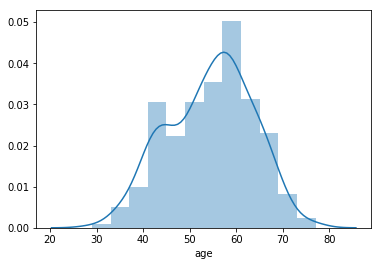

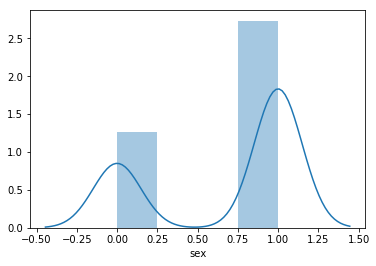

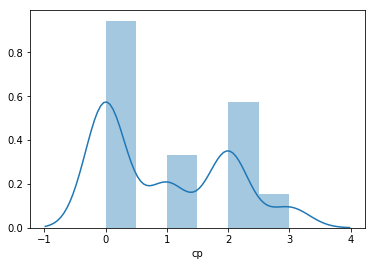

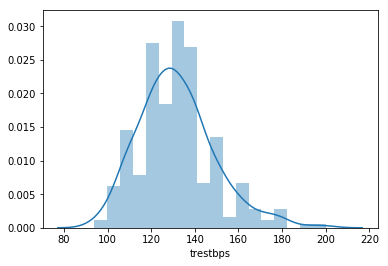

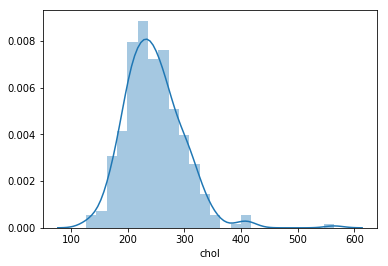

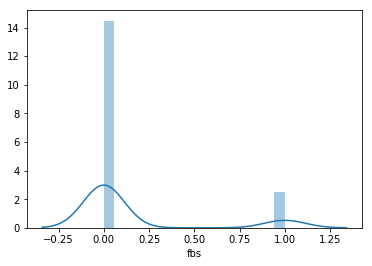

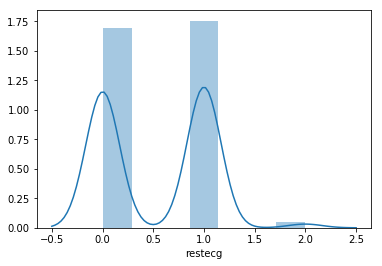

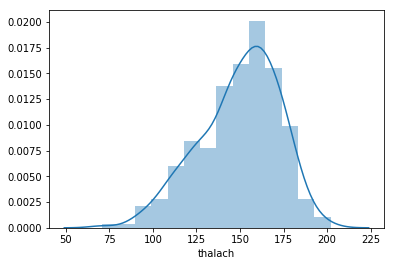

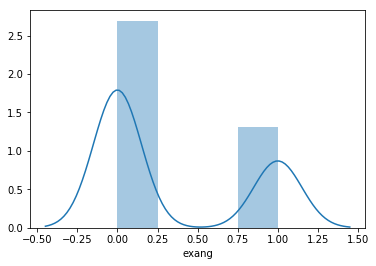

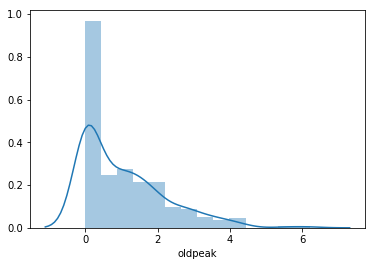

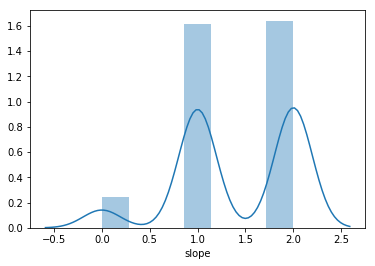

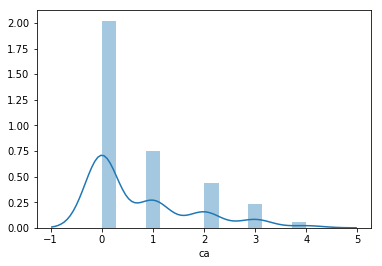

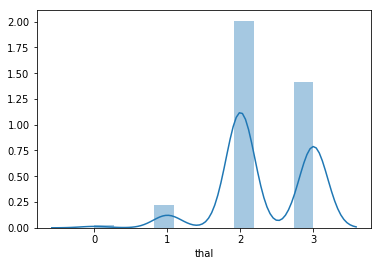

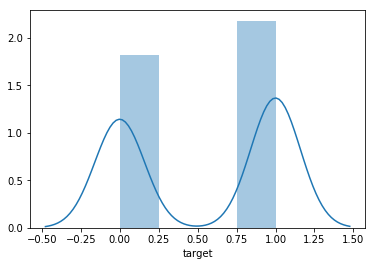

In [6]:
for column in df:
    sns.distplot(df[column])
    plt.show()

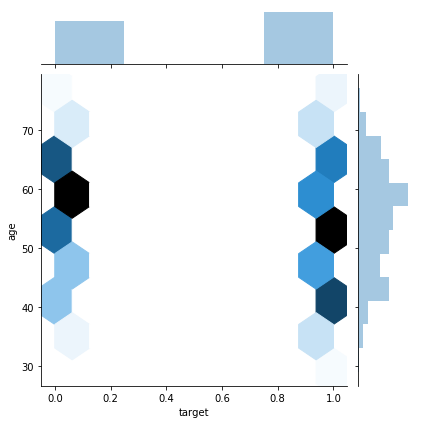

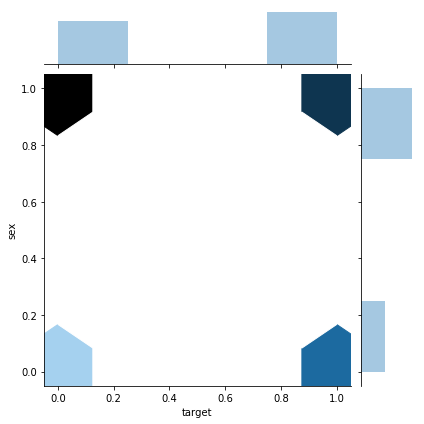

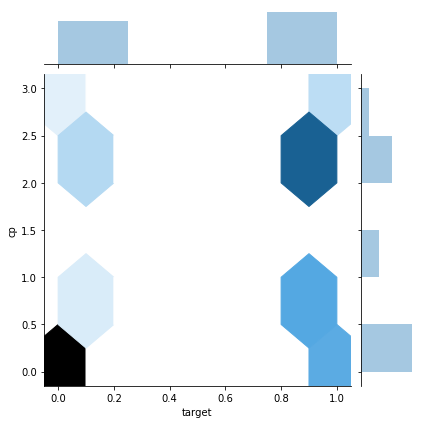

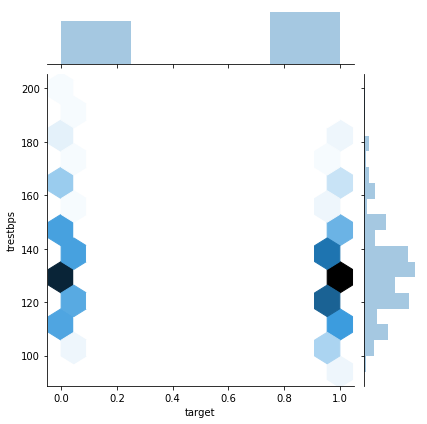

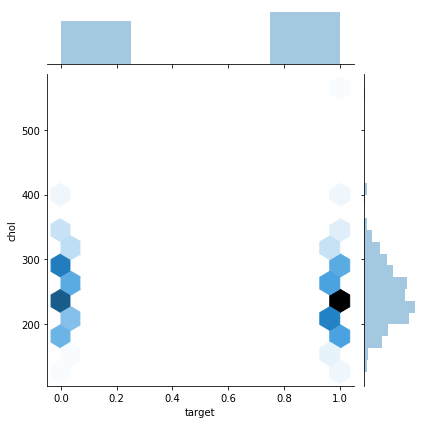

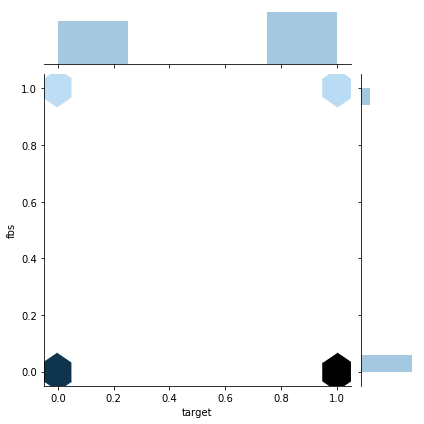

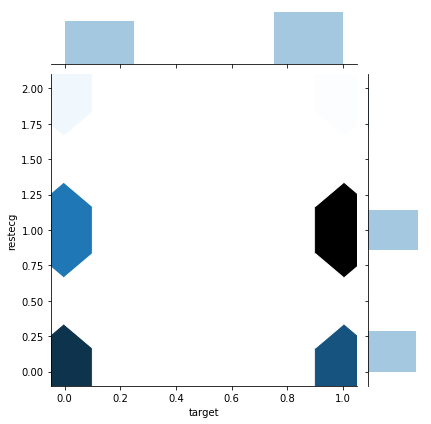

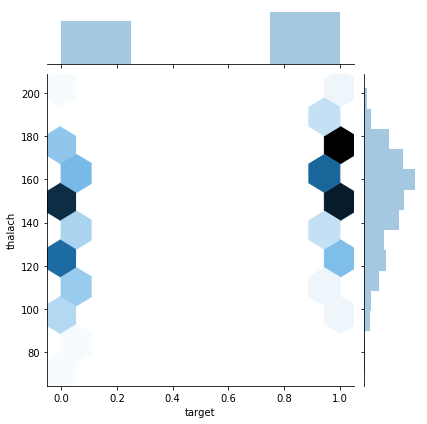

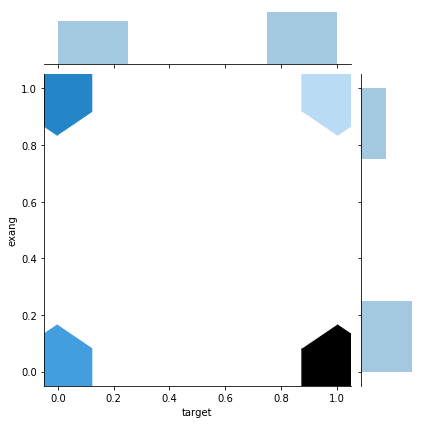

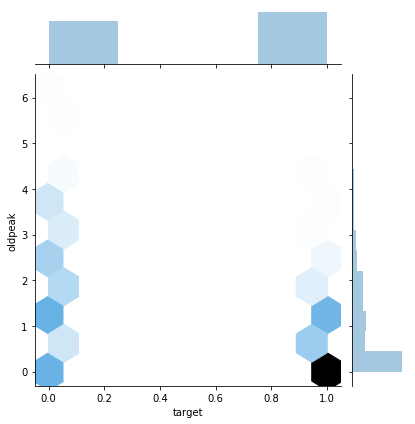

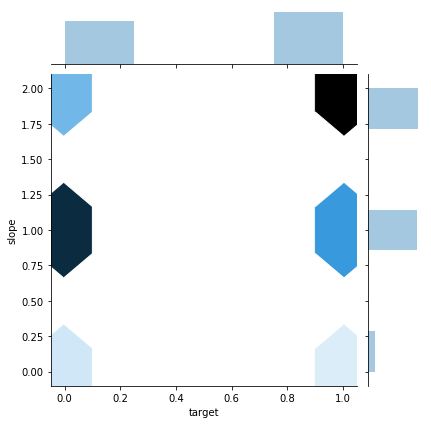

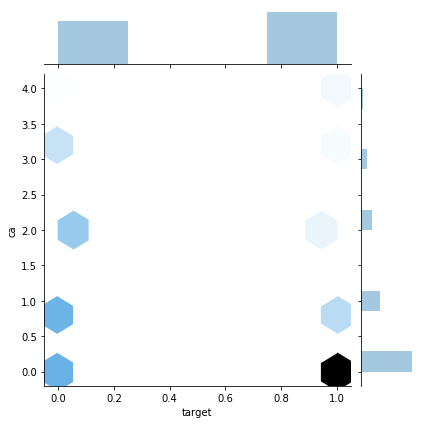

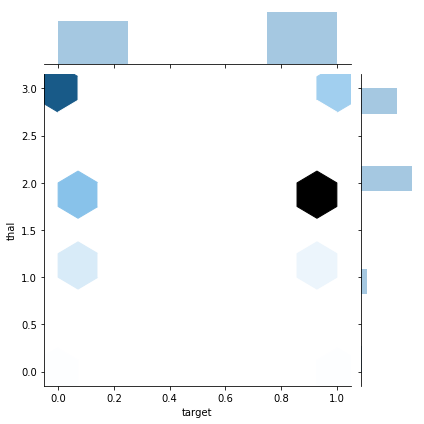

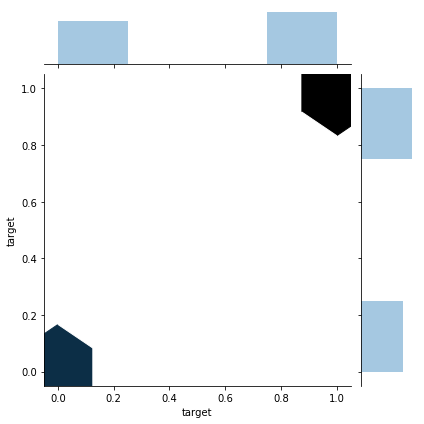

In [7]:
for column in df:
    sns.jointplot(x='target', y=column, data=df, kind='hex')
    plt.show()

# Preprocessing

In [8]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]
continuous_features = ["trestbps", "chol", "thalach", "oldpeak", "age"]

In [9]:
data = df.copy()

one_hot_categorical_features = []

for feature in categorical_features:
    ohe = OneHotEncoder(sparse=False, categories='auto')
    hs_train_transformed = ohe.fit_transform(data[[feature]])
    feature_names = ohe.get_feature_names()
    columns = list(map(lambda f: feature + "_" + f[3:], feature_names))
    one_hot_categorical_features += columns
    new_df = data.join(pd.DataFrame(data=hs_train_transformed, columns=columns))

# Training

No handles with labels found to put in legend.


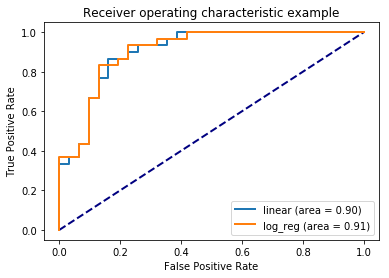

In [10]:
training_features = continuous_features + categorical_features

features = df.loc[:, training_features].values
targets = df.loc[:, "target"].values

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
linear_reg = LinearRegression()

lw=2

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

for model, model_name in zip([linear_reg, log_reg], ["linear", "log_reg"]):
    # Fit model
    model.fit(X=X_train, y=y_train)

    # Predict on train set
    if model_name == "log_reg":
        predictions = model.predict_proba(X=X_test)[:, 1]
    else:
        predictions = model.predict(X=X_test)

    # Compute ROC curve and AUC
    score = roc_auc_score(y_true = y_test, y_score=predictions)
    fpr, tpr, _ = roc_curve(y_true = y_test, y_score=predictions)
    
    # Plot
    plt.plot(fpr, tpr ,lw=lw, label=model_name + ' (area = %0.2f)' % score)
    
plt.legend()
plt.show()